In [5]:
import torch
from torch import nn
import numpy as np
from src.data import math_tags
from src.data import set_seq

In [19]:
import logging
logging.info("hi")
_LOGGER = logging.getLogger()

INFO:root:hi


In [2]:
sequences = math_tags.get_sequences()

In [3]:
pairs = []
for sequence in sequences:
    for seq_set in sequence:
        for i in range(len(seq_set)):
            for j in range(i+1, len(seq_set)):
                pairs.append((seq_set[i],seq_set[j]))

In [ ]:
W1,W2 = set_seq.generate_embedding(pairs, .N_ELEMENTS, embedding_dims=5, n_epoch=10)
W = W1.t().data+W2.data
W_norm = W.div(torch.norm(W,dim=1).view(-1,1))
torch.save(W_norm, 'data/processed/math_tags_embedding_normalized_d2.pt')

In [32]:
W_norm = torch.load('data/processed/math_tags_embedding_normalized_d2.pt')

torch.Size([1664, 5])

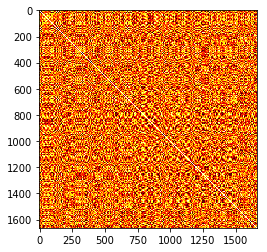

In [34]:
# printing a heat map
import matplotlib.pyplot as plt
heatmap = W_norm.matmul(W_norm.t())
plt.imshow(heatmap.numpy(), cmap='hot')
plt.show()

In [35]:
heatmap = abs(heatmap)

In [36]:
labels = math_tags.get_labels()

kth_relevent = -10
for i in range(1664):
    idx = np.argsort(heatmap[i])
    print("{} {} {}".format(labels[i],labels[idx[kth_relevent]], heatmap[i,idx[kth_relevent]]))

elementary-set-theory injective-module 0.943859875202179
intuition braidings 0.9445448517799377
infinity fourier-analysis 0.9302058815956116
faq number-systems 0.9362956881523132
calculus trace-map 0.9421694278717041
limits hecke-algebras 0.9336657524108887
definition cauchy-problem 0.9510576725006104
soft-question meromorphic-functions 0.9405649304389954
big-list monte-carlo 0.9234286546707153
online-resources compactness 0.9282962083816528
elementary-number-theory graph-invariants 0.9394699931144714
proof-writing integer-relation 0.9121019840240479
radicals geometric-functional-analysis 0.9467108249664307
rationality-testing point-cloud 0.9298503994941711
math-software algorithmic-randomness 0.9323739409446716
linear-algebra forcing 0.9364995956420898
combinatorics minimal-polynomials 0.9410507678985596
generating-functions pseudo-euclidean-spaces 0.9522760510444641
fibonacci-numbers betti-numbers 0.9404615163803101
algebra-precalculus limits-without-lhopital 0.9332316517829895
decim

procrustes-problem finite-groups 0.9496649503707886
algebraic-graph-theory subgroup-growth 0.946666955947876
matrix-exponential linear-diophantine-equations 0.9187331199645996
periodic-functions mathematical-modeling 0.9592287540435791
minimal-polynomials quadratic-integer-rings 0.9425270557403564
positive-characteristic equivalent-metrics 0.9476341605186462
stochastic-calculus buildings 0.9419726729393005
finite-geometry schemes 0.9406131505966187
separable-spaces ordinals 0.9364449381828308
percolation combinatorial-geometry 0.9271049499511719
jordan-normal-form transcendental-equations 0.9172325134277344
cyclotomic-polynomials fixedpoints 0.9431491494178772
mellin-transform pochhammer-symbol 0.9311056137084961
fermat-numbers definite-integrals 0.9592182040214539
geometric-algebras naive-bayes 0.9313589930534363
riemann-sum hilbert-spaces 0.9511784315109253
research descent 0.9359418749809265
transcendental-equations exponential-distribution 0.9326868057250977
median 2-categories 0.9

hilbert-matrices spheres 0.9388054013252258
divergence cauchy-problem 0.9379788041114807
secant mean-value-theorem 0.9421089291572571
lambda-rings cw-complexes 0.9444414377212524
holomorphic-functions lie-algebras 0.9537196159362793
st-connectivity lmis 0.9447152018547058
cut-space quotient-group 0.9257325530052185
lu-decomposition topological-k-theory 0.9561680555343628
sampling-theory tangent-line 0.9367629289627075
dglas polarization-operators 0.9385416507720947
rational-homotopy-theory coalgebras 0.9354317784309387
cumulants cayley-hamilton 0.9507640600204468
soliton-theory extremal-combinatorics 0.9492040872573853
ring-homomorphism complex-integration 0.9431947469711304
resultant multinomial-coefficients 0.9418925642967224
interval-arithmetic derived-functors 0.9324091076850891
semialgebraic-geometry topological-rings 0.9267187714576721
euler-method irreducible-polynomials 0.9500007033348083
fixed-point-arithmetics electromagnetism 0.9575814008712769
number-line verma-modules 0.93

In [45]:
cooccurrence_counts = np.zeros((math_tags.N_ELEMENTS, math_tags.N_ELEMENTS))
pairs = []
for sequence in sequences:
    for seq_set in sequence:
        for i in range(len(seq_set)):
            for j in range(i+1, len(seq_set)):
                cooccurrence_counts[seq_set[i], seq_set[j]] += 1

for i in range(math_tags.N_ELEMENTS):
    for j in range(i+1, math_tags.N_ELEMENTS):
        cooccurrence_counts[i][j] += cooccurrence_counts[j][i]

In [46]:
cooccurrence_counts

array([[ 0., 42., 63., ...,  0.,  0.,  0.],
       [40.,  0.,  3., ...,  0.,  0.,  0.],
       [63.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(cooccurrence_counts)

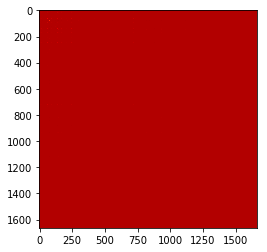

In [76]:
components = pca.components_
# printing a heat map
import matplotlib.pyplot as plt
heatmap = components.T.dot(components)
plt.imshow(heatmap, cmap='hot')
plt.show()

In [78]:
labels = math_tags.get_labels()

kth_relevent = -1
for i in range(1664):
    idx = np.argsort(heatmap[i])
    print("{} {} {}".format(labels[i],labels[idx[kth_relevent]], heatmap[i,idx[kth_relevent]]))

elementary-set-theory calculus 0.01691739801785388
intuition calculus 0.0032406397597210686
infinity calculus 0.0013598020408873374
faq real-analysis 1.0791353491837668e-05
calculus calculus 0.6797692634773341
limits integration 0.17934006371953573
definition real-analysis 0.006979104940808984
soft-question matrices 0.014798086293621731
big-list real-analysis 0.0017292583378360382
online-resources real-analysis 0.00032761315210658984
elementary-number-theory probability 0.007743573337862282
proof-writing calculus 0.01602154130488438
radicals real-analysis 0.0073033544467638895
rationality-testing real-analysis 0.00017246321891977497
math-software matrices 0.0010678847781354685
linear-algebra matrices 0.24097883618276256
combinatorics probability 0.07573108624390658
generating-functions probability 0.010496874420654128
fibonacci-numbers calculus 0.002202052184604795
algebra-precalculus real-analysis 0.04969767145055902
decimal-expansion calculus 0.0007757609363866802
geometry matrices 0

bayesian probability 0.012117432103905498
intersection-theory group-theory 0.0005082074970119274
cayley-table group-theory 0.0008076362947259908
balls-in-bins probability 0.003351692887454911
quadrilateral matrices 0.0002229459764549029
dirac-delta calculus 0.0034058072428541095
lattices-in-lie-groups group-theory 0.00019961227345634158
lotteries probability 0.00033141939925612806
provability probability 7.785485364723603e-05
tangent-line real-analysis 0.0018727606789831325
sheaf-cohomology group-theory 0.0005765345498177373
error-propagation probability 0.00043393551877636565
continuous-homomorphisms group-theory 0.00022564484874290373
hypothesis-testing probability 0.00766035743061072
inverse-semigroups group-theory 0.00021976709824938841
complex-integration calculus 0.006220953382246573
fresnel-integrals calculus 0.00043752281607441906
locus matrices 0.0002257604859199529
obstruction-theory group-theory 3.5773305727830846e-05
block-matrices matrices 0.0037910850112941887
fractal-ana

In [81]:
torch.save(torch.tensor(components), 'data/processed/math_tags/coocurance_count_pca_5.pt')